In [1]:
from climada.engine.calibration_opt import calib_instance

In [2]:
from climada.hazard import Hazard

In [404]:
import pandas as pd
emdat = pd.read_excel("/Users/szelie/Library/CloudStorage/OneDrive-ETHZurich/data/emdat_public_2023_01_31_query_uid-75h3ij.xlsx")
emdat_RF = emdat[emdat['Disaster Subtype']=='Riverine flood'][["Year","Total Damages, Adjusted ('000 US$)", "Country", "ISO"]]
emdat_RF = emdat_RF[(emdat_RF['Year']<2010)&(emdat_RF['Year']>1981)]
emdat_RF = emdat_RF.dropna()

In [405]:
gdp = pd.read_csv("/Users/szelie/Library/CloudStorage/OneDrive-ETHZurich/data/API_NY/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4770391.csv")
years = [str(1980+n) for n in range(41)]
gdp_factor = (gdp[gdp['Country Code']=='WLD'][years]/gdp[gdp['Country Code']=='WLD']['2020'][259])
gdp_factor = gdp_factor.transpose().reset_index().rename(columns={'index':'Year',259:'Growth Factor Rel 2020'})
gdp_factor['Year'] = gdp_factor['Year'].astype('int')
emdat_RF = pd.merge(emdat_RF, gdp_factor, on='Year')
emdat_RF['Total Damages, growth adjusted']=emdat_RF["Total Damages, Adjusted ('000 US$)"]*emdat_RF["Growth Factor Rel 2020"]


In [453]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood, flood_imp_func_set

impf_set_flood = flood_imp_func_set()

In [254]:
from climada.util.constants import RIVER_FLOOD_REGIONS_CSV

regions_df = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)


In [42]:
from climada.util.api_client import Client
client = Client()
assets = client.get_litpop()

https://climada.ethz.ch/data-api/v1/dataset	data_type=litpop	exponents=(1,1)	limit=100000	name=None	spatial_coverage=global	status=active	version=None


In [188]:
import pycountry
#assets.gdf['region_id2']
a = [regions_df['Reg_name'][regions_df['ISO']==pycountry.countries.lookup(format(country, '03d')).alpha_3].values[0] for country in assets.gdf.region_id[0:1000]]

In [429]:
regions_df

,ISO,ID,Reg_ID,Reg_name,impf_RF,region_id
0,ABW,1,2,CAR,6,533
1,AFG,2,6,SWA,2,4
2,AGO,3,13,SAF,1,24
3,AIA,4,2,CAR,6,660
4,ALB,5,11,EUR,3,8
...,...,...,...,...,...,...
225,WSM,226,10,PIS2,5,882
226,YEM,227,15,ARA,2,887
227,ZAF,228,13,SAF,1,710
228,ZMB,229,5,SSA,1,894


In [257]:
regions_df = regions_df[regions_df["ISO"]!='SCG']
regions_df = regions_df[regions_df["ISO"]!='ANT']

In [258]:
regions_df["region_id"] = [pycountry.countries.lookup(c).numeric for c in regions_df["ISO"]]
regions_df["region_id"] = regions_df["region_id"].astype("int")

In [430]:
regions_df[regions_df.ISO=='USA']

,ISO,ID,Reg_ID,Reg_name,impf_RF,region_id
216,USA,217,1,NAM,4,840


In [211]:
assets.gdf = assets.gdf.merge(regions_df[["region_id","Reg_name","impf_RF"]])

In [45]:
haz_rf_path = "/Users/szelie/OneDrive - ETH Zurich/data/river_flood/hazard/river_flood_150arcsec_hist_1980_2010.hdf5"
haz_rf = Hazard.from_hdf5(haz_rf_path)

In [48]:
models = ["_".join(event_name.split("_")[1:4]) for event_name in haz_rf.event_name]

In [49]:
import numpy as np
models = np.unique(models)

In [50]:
import copy


In [212]:
assets.gdf

,value,geometry,latitude,longitude,region_id,impf_,region_id2,Reg_name,impf_RF
0,1.282043e+09,POINT (-70.02083 12.56250),12.562500,-70.020833,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
1,6.681992e+07,POINT (-69.97917 12.56250),12.562500,-69.979167,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
2,1.130641e+09,POINT (-70.02083 12.52083),12.520833,-70.020833,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
3,7.358551e+08,POINT (-69.97917 12.52083),12.520833,-69.979167,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
4,2.680846e+07,POINT (-69.93750 12.52083),12.520833,-69.937500,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
...,...,...,...,...,...,...,...,...,...
8418523,1.614874e+04,POINT (31.39583 -22.31250),-22.312500,31.395833,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1
8418524,1.296877e+04,POINT (31.22917 -22.35417),-22.354167,31.229167,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1
8418525,1.663883e+04,POINT (31.27083 -22.35417),-22.354167,31.270833,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1
8418526,1.928599e+04,POINT (31.31250 -22.35417),-22.354167,31.312500,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1


In [279]:
# Use these commands in the same cell.

%load_ext autoreload
%autoreload 2
from climada.engine import calibration_opt as clb 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
emdat_RF

,year,"Total Damages, Adjusted ('000 US$)",Country,ISO,Growth Factor Rel 2020_x,Growth Factor Rel 2020_y,Growth Factor Rel 2020,impact_scaled,impact_CLIMADA
0,1983,1774734.0,France,FRA,0.139122,0.139122,0.139122,246905.350922,0.0
1,1985,625757.0,Argentina,ARG,0.151132,0.151132,0.151132,94572.057366,0.0
2,1985,544137.0,Brazil,BRA,0.151132,0.151132,0.151132,82236.643904,0.0
3,1985,837971.0,India,IND,0.151132,0.151132,0.151132,126644.434634,0.0
4,1985,1360.0,Mozambique,MOZ,0.151132,0.151132,0.151132,205.539847,0.0
...,...,...,...,...,...,...,...,...,...
653,2009,128.0,Mongolia,MNG,0.714455,0.714455,0.714455,91.450208,0.0
654,2009,81847.0,Nepal,NPL,0.714455,0.714455,0.714455,58475.977758,0.0
655,2009,1119.0,Paraguay,PRY,0.714455,0.714455,0.714455,799.474863,0.0
656,2009,1227711.0,Saudi Arabia,SAU,0.714455,0.714455,0.714455,877143.953102,0.0


In [216]:
assets_reg.gdf

,value,geometry,latitude,longitude,region_id,impf_,region_id2,Reg_name,impf_RF
97488,4.405133e+05,POINT (53.72917 24.22917),24.229167,53.729167,784,1,"7 ARA\nName: Reg_name, dtype: object",ARA,2
97489,4.263395e+06,POINT (53.81250 24.22917),24.229167,53.812500,784,1,"7 ARA\nName: Reg_name, dtype: object",ARA,2
97490,7.694630e+05,POINT (53.85417 24.22917),24.229167,53.854167,784,1,"7 ARA\nName: Reg_name, dtype: object",ARA,2
97491,3.900159e+05,POINT (53.64583 24.18750),24.187500,53.645833,784,1,"7 ARA\nName: Reg_name, dtype: object",ARA,2
97492,7.319897e+05,POINT (53.68750 24.18750),24.187500,53.687500,784,1,"7 ARA\nName: Reg_name, dtype: object",ARA,2
...,...,...,...,...,...,...,...,...,...
8297979,3.148548e+04,POINT (44.10417 12.64583),12.645833,44.104167,887,1,"226 ARA\nName: Reg_name, dtype: object",ARA,2
8297980,2.940464e+04,POINT (44.22917 12.64583),12.645833,44.229167,887,1,"226 ARA\nName: Reg_name, dtype: object",ARA,2
8297981,2.920067e+04,POINT (44.27083 12.64583),12.645833,44.270833,887,1,"226 ARA\nName: Reg_name, dtype: object",ARA,2
8297982,2.561849e+04,POINT (43.93750 12.60417),12.604167,43.937500,887,1,"226 ARA\nName: Reg_name, dtype: object",ARA,2


In [253]:
emdat_RF

,year,"Total Damages, Adjusted ('000 US$)",Country,ISO,Growth Factor Rel 2020_x,Growth Factor Rel 2020_y,Growth Factor Rel 2020,impact_scaled,impact_CLIMADA
0,1983,1774734.0,France,FRA,0.139122,0.139122,0.139122,246905.350922,30850.701181
1,1985,625757.0,Argentina,ARG,0.151132,0.151132,0.151132,94572.057366,57950.441938
2,1985,544137.0,Brazil,BRA,0.151132,0.151132,0.151132,82236.643904,57950.441938
3,1985,837971.0,India,IND,0.151132,0.151132,0.151132,126644.434634,57950.441938
4,1985,1360.0,Mozambique,MOZ,0.151132,0.151132,0.151132,205.539847,57950.441938
...,...,...,...,...,...,...,...,...,...
653,2009,128.0,Mongolia,MNG,0.714455,0.714455,0.714455,91.450208,40526.301785
654,2009,81847.0,Nepal,NPL,0.714455,0.714455,0.714455,58475.977758,40526.301785
655,2009,1119.0,Paraguay,PRY,0.714455,0.714455,0.714455,799.474863,40526.301785
656,2009,1227711.0,Saudi Arabia,SAU,0.714455,0.714455,0.714455,877143.953102,40526.301785


In [256]:
regions_df

,ISO,ID,Reg_ID,Reg_name,impf_RF
0,ABW,1,2,CAR,6
1,AFG,2,6,SWA,2
2,AGO,3,13,SAF,1
3,AIA,4,2,CAR,6
4,ALB,5,11,EUR,3
...,...,...,...,...,...
225,WSM,226,10,PIS2,5
226,YEM,227,15,ARA,2
227,ZAF,228,13,SAF,1
228,ZMB,229,5,SSA,1


In [314]:
emdat_reg.groupby("year").sum().reset_index()

/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_62486/3808737182.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emdat_reg.groupby("year").sum().reset_index()


,year,region_id,"Total Damages, Adjusted ('000 US$)",Growth Factor Rel 2020,impact_scaled,impact_CLIMADA
0,1986,364,4167878.0,0.178693,7.447718e+05,1.234689e+04
1,1989,262,2597.0,0.237323,6.163273e+02,1.030690e+04
2,1990,1156,509341.0,0.535424,1.363568e+05,1.275470e+04
3,1991,1092,931310.0,0.837675,2.600449e+05,3.709017e+04
4,1992,728,7236038.0,0.597148,2.160491e+06,4.505811e+05
5,1993,2046,2231240.0,0.910385,6.770961e+05,1.448029e+06
6,1994,626,284548.0,0.655111,9.320524e+04,1.563330e+04
7,1995,1156,217979.0,0.729646,7.952380e+04,5.874654e+04
8,1996,2866,2326554.0,1.864854,8.677366e+05,5.962529e+04
9,1997,728,45580.0,0.743260,1.693890e+04,2.565159e+04


In [406]:
emdat_RF = emdat_RF.rename(columns={"Year":'year', "Total Damages, growth adjusted":"impact_scaled"})    
emdat_RF["impact_scaled"] =emdat_RF["impact_scaled"]*1000
emdat_RF = regions_df[['ISO','region_id','Reg_name']].merge(emdat_RF)

In [428]:
np.unique(list(regions_df.Reg_name))

array(['ARA', 'AUS', 'CAR', 'CAS', 'CHN', 'EUA', 'EUR', 'LAN', 'LAS',
       'NAF', 'NAM', 'PIS1', 'PIS2', 'SAF', 'SEA', 'SSA', 'SWA', 'nan'],
      dtype='<U32')

## Some attemps at calibration, not successful:

/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_62486/4244973268.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emdat_reg = emdat_reg.groupby("year").sum().reset_index()


{'mdd_shift': 0.0, 'mdd_scale': 0.9}
2023-03-09 15:12:55,439 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:55,496 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.
2023-03-09 15:12:55,791 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 1.4901161193847656e-08, 'mdd_scale': 0.9}
2023-03-09 15:12:55,799 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:55,849 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:56,094 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.0, 'mdd_scale': 0.9000000149011612}
2023-03-09 15:12:56,102 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:56,140 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:56,386 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.34414447200064124, 'mdd_scale': 1.3526146752390076}
2023-03-09 15:12:56,399 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:56,442 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:56,697 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.34414448690180244, 'mdd_scale': 1.3526146752390076}
2023-03-09 15:12:56,704 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:56,742 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:56,988 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.34414447200064124, 'mdd_scale': 1.3526146953945368}
2023-03-09 15:12:56,995 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:57,035 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:57,281 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.5417387767203405, 'mdd_scale': 1.6124883310320828}
2023-03-09 15:12:57,291 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:57,331 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:12:57,586 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.5417387916215017, 'mdd_scale': 1.6124883310320828}
2023-03-09 15:12:57,593 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:57,631 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:57,878 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.5417387767203405, 'mdd_scale': 1.6124883550600313}
2023-03-09 15:12:57,886 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:57,929 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:58,175 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6006313947665916, 'mdd_scale': 1.6899431947874686}
2023-03-09 15:12:58,187 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:58,228 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:12:58,484 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6006314096677527, 'mdd_scale': 1.6899431947874686}
2023-03-09 15:12:58,491 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:58,528 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:58,776 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6006313947665916, 'mdd_scale': 1.6899432199695845}
2023-03-09 15:12:58,782 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:58,823 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:59,067 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6118183546435112, 'mdd_scale': 1.7046561500244608}
2023-03-09 15:12:59,079 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:59,118 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:12:59,372 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6118183695446724, 'mdd_scale': 1.7046561500244608}
2023-03-09 15:12:59,379 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:59,416 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:59,661 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6118183546435112, 'mdd_scale': 1.704656175425817}
2023-03-09 15:12:59,668 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:12:59,705 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:12:59,951 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123078651383602, 'mdd_scale': 1.7052999483466136}
2023-03-09 15:12:59,963 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:00,002 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:00,257 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123078800395214, 'mdd_scale': 1.7052999483466136}
2023-03-09 15:13:00,264 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:00,301 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:00,544 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123078651383602, 'mdd_scale': 1.705299973757563}
2023-03-09 15:13:00,551 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:00,589 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:00,835 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:00,847 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:00,886 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:01,140 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:01,146 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:01,184 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:01,429 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:01,435 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:01,474 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:01,723 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:01,735 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:01,775 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:02,028 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:02,035 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:02,073 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:02,319 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:02,326 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:02,363 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:02,607 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:02,627 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:02,666 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:02,920 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:02,927 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:02,964 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:03,209 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:03,216 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:03,253 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:03,497 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:03,509 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:03,549 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:03,803 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:03,809 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:03,846 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:04,093 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:04,100 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:04,138 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:04,383 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:04,401 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:04,439 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:04,692 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:04,699 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:04,737 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:04,980 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:04,987 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:05,025 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:05,271 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:05,282 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:05,321 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:05,575 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:05,581 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:05,619 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:05,864 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:05,870 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:05,909 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:06,154 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:06,171 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:06,211 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:06,464 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:06,471 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:06,509 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:06,753 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:06,760 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:06,797 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:07,042 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:07,054 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:07,093 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:07,346 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:07,353 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:07,391 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:07,636 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:07,643 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:07,681 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:07,927 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:07,949 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:07,988 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:08,246 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:08,253 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:08,291 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:08,536 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:08,543 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:08,581 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:08,825 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:08,838 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:08,877 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:09,132 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:09,139 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:09,176 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:09,420 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:09,427 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:09,465 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:09,710 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:09,730 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:09,768 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:10,022 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:10,029 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:10,066 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:10,310 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:10,317 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:10,354 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:10,600 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:10,612 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:10,652 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:10,906 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:10,913 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:10,950 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:11,194 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:11,200 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:11,237 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:11,482 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:11,503 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:11,543 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:11,795 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:11,802 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:11,839 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:12,085 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:12,091 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:12,129 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:12,375 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:12,387 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:12,426 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:12,682 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:12,689 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:12,726 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:12,972 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:12,979 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:13,017 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:13,261 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:13,282 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:13,321 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:13,574 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:13,581 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:13,618 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:13,864 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:13,871 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:13,912 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:14,157 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:14,168 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:14,207 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:14,461 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:14,468 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:14,505 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:14,749 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:14,756 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:14,793 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:15,036 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:15,056 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:15,100 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:15,352 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:15,359 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:15,397 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:15,642 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:15,649 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:15,686 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:15,931 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:15,943 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:15,982 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:16,235 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:16,242 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:16,279 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:16,523 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:16,529 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:16,568 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:16,814 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:16,833 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:16,873 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:17,127 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:17,134 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:17,173 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:17,421 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:17,428 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:17,466 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:17,714 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:17,726 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:17,766 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:18,022 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:18,028 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:18,066 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:18,317 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:18,324 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:18,362 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:18,607 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:18,627 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:18,667 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:18,922 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:18,929 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:18,967 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:19,214 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:19,220 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:19,258 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:19,505 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:19,517 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:19,557 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:19,812 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:19,819 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:19,856 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:20,102 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:20,109 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:20,146 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:20,391 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:20,412 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:20,451 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:20,705 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.612308835836917, 'mdd_scale': 1.7053012053998657}
2023-03-09 15:13:20,712 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:20,750 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:20,996 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088209357558, 'mdd_scale': 1.705301230810834}
2023-03-09 15:13:21,003 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:21,044 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:21,292 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:21,304 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:21,343 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


2023-03-09 15:13:21,600 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088211323524, 'mdd_scale': 1.705301186060599}
2023-03-09 15:13:21,607 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:21,645 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:21,891 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
{'mdd_shift': 0.6123088062311912, 'mdd_scale': 1.7053012114715669}
2023-03-09 15:13:21,898 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 15:13:21,935 - climada.hazard.base - WARNING - Impact function id=3 has mdr(0) != 0.The mean damage ratio must thus be computed for all values ofhazard intensity including 0 which can be very time consuming.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():


2023-03-09 15:13:22,181 - climada.engine.impact - WARNING - The use of Impact.calc_impact_year_set is deprecated.Use Impact.impact_per_year instead.
`xtol` termination condition is satisfied.
Number of iterations: 90, function evaluations: 90, CG iterations: 155, optimality: 5.01e+10, constraint violation: 0.00e+00, execution time: 2.6e+01 s.


/Users/szelie/python_projects/climada_python/climada/engine/calibration_opt.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cnt_, year in years_in_common.iteritems():
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


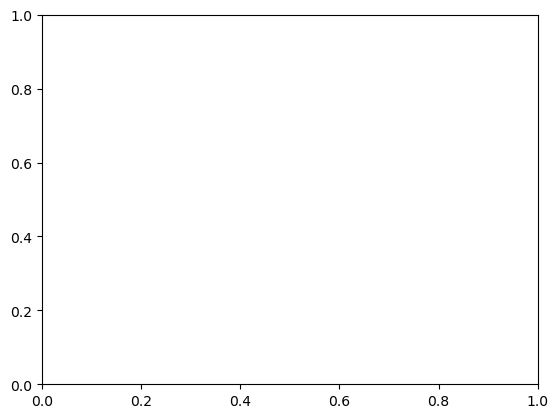

In [451]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
impf_dict = {}

for reg in ["EUR"]:#np.unique(list(regions_df.Reg_name))[0:1]: 
    impf_dict[reg] = {}
    for model in models[0:1]:
        haz_1model = haz_rf.select([event_name for event_name in haz_rf.event_name if model in event_name])
        haz_1model.frequency = np.ones(len(haz_1model.frequency))
        assets_reg = copy.deepcopy(assets)
        assets_reg.gdf = assets_reg.gdf[assets_reg.gdf.Reg_name == reg]        
        assets_reg.region_id  = assets_reg.gdf.region_id
        emdat_reg = emdat_RF[emdat_RF.Reg_name==reg]
        emdat_reg = emdat_reg.groupby("year").sum().reset_index()
        year_range = [1980, 2010]
        yearly_impact = True

        cost_function = 'R2'
        show_details = True
        yearly_impact = True
        impf = impf_set_flood.get_func()['RF'][np.unique(assets_reg.gdf['impf_RF'])[0]]

        param_full_dict = {'mdd_shift': np.array(0), 'mdd_scale': np.array(0.9)}
        bounds = ((0.0, np.inf), (0.0, np.inf), (0.0, 1.0))
        param_result, result = clb.calib_optimize(haz_1model,assets_reg,impf,param_full_dict,
                  emdat_reg, year_range, yearly_impact=yearly_impact,
                  cost_fucntion=cost_function, show_details= show_details)
        impf2 = clb.change_impf(impf, param_result)
        impf_dict[reg][model] = [impf,impf2]

In [447]:
emdat_reg

,year,region_id,"Total Damages, Adjusted ('000 US$)",Growth Factor Rel 2020,impact_scaled,impact_CLIMADA
0,1982,616,160733.0,0.136416,2.192662e+07,9.036244e+08
1,1983,250,1774734.0,0.139122,2.469054e+08,2.586485e+08
2,1985,752,15780.0,0.151132,2.384867e+06,3.586140e+08
3,1987,1340,4592331.0,0.406796,9.340705e+08,2.241519e+08
4,1991,40,176205.0,0.279225,4.920082e+07,1.298042e+08
5,1992,1288,1511906.0,0.895721,4.514155e+08,1.581517e+08
6,1993,1850,2789633.0,1.517309,8.465471e+08,2.799874e+08
7,1994,3134,20478830.0,2.292888,6.707952e+09,2.512956e+09
8,1995,578,576155.0,0.364823,2.101947e+08,4.346270e+09
9,1996,927,1143005.0,0.745942,4.263074e+08,2.940544e+08


In [435]:
impf_dict['NAM']

{}

<AxesSubplot:title={'center':'RF 3: Flood Europe JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

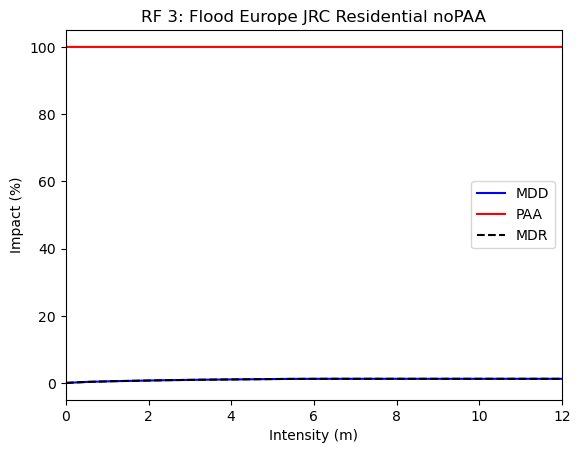

In [425]:
impf_dict['EUR']['gswp3_jules-w1_hist'][1].plot()

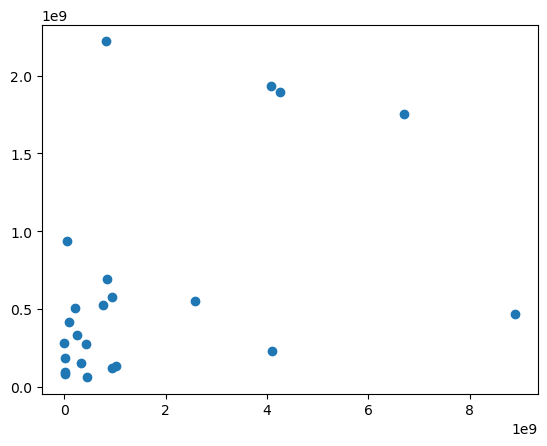

In [421]:
fig, ax = plt.subplots()
ax.scatter(emdat_reg.impact_scaled, emdat_reg.impact_CLIMADA)

In [318]:
from climada.engine import Impact

<AxesSubplot:title={'center':'RF 3: Flood Europe JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

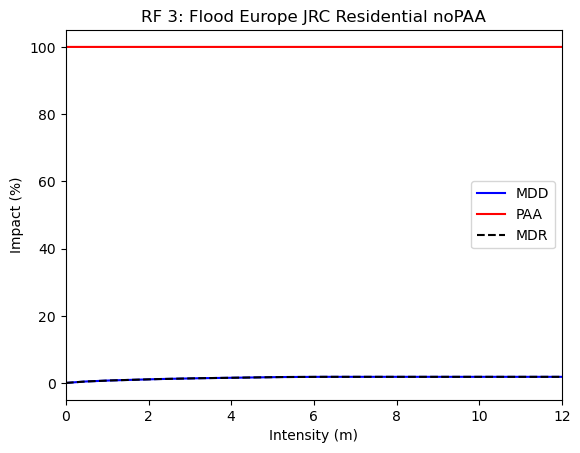

In [452]:
#impf2.mdd[impf2.mdd<0]=0
impf2.plot()
#impf_set_flood.append(impf2)

In [374]:
np.unique(list(regions_df.Reg_name))

array(['ARA', 'AUS', 'CAR', 'CAS', 'CHN', 'EUA', 'EUR', 'LAN', 'LAS',
       'NAF', 'NAM', 'PIS1', 'PIS2', 'SAF', 'SEA', 'SSA', 'SWA', 'nan'],
      dtype='<U32')

In [528]:
assets.gdf

,value,geometry,latitude,longitude,region_id,impf_,region_id2,Reg_name,impf_RF
0,1.282043e+09,POINT (-70.02083 12.56250),12.562500,-70.020833,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
1,6.681992e+07,POINT (-69.97917 12.56250),12.562500,-69.979167,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
2,1.130641e+09,POINT (-70.02083 12.52083),12.520833,-70.020833,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
3,7.358551e+08,POINT (-69.97917 12.52083),12.520833,-69.979167,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
4,2.680846e+07,POINT (-69.93750 12.52083),12.520833,-69.937500,533,1,"0 CAR\nName: Reg_name, dtype: object",CAR,6
...,...,...,...,...,...,...,...,...,...
8418523,1.614874e+04,POINT (31.39583 -22.31250),-22.312500,31.395833,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1
8418524,1.296877e+04,POINT (31.22917 -22.35417),-22.354167,31.229167,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1
8418525,1.663883e+04,POINT (31.27083 -22.35417),-22.354167,31.270833,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1
8418526,1.928599e+04,POINT (31.31250 -22.35417),-22.354167,31.312500,716,1,"229 SSA\nName: Reg_name, dtype: object",SSA,1


In [602]:
event_names

['1980_gswp3_watergap2_hist',
 '1981_gswp3_watergap2_hist',
 '1982_gswp3_watergap2_hist',
 '1983_gswp3_watergap2_hist',
 '1984_gswp3_watergap2_hist',
 '1985_gswp3_watergap2_hist',
 '1986_gswp3_watergap2_hist',
 '1987_gswp3_watergap2_hist',
 '1988_gswp3_watergap2_hist',
 '1989_gswp3_watergap2_hist',
 '1990_gswp3_watergap2_hist',
 '1991_gswp3_watergap2_hist',
 '1992_gswp3_watergap2_hist',
 '1993_gswp3_watergap2_hist',
 '1994_gswp3_watergap2_hist',
 '1995_gswp3_watergap2_hist',
 '1996_gswp3_watergap2_hist',
 '1997_gswp3_watergap2_hist',
 '1998_gswp3_watergap2_hist',
 '1999_gswp3_watergap2_hist',
 '2000_gswp3_watergap2_hist',
 '2001_gswp3_watergap2_hist',
 '2002_gswp3_watergap2_hist',
 '2003_gswp3_watergap2_hist',
 '2004_gswp3_watergap2_hist',
 '2005_gswp3_watergap2_hist',
 '2006_gswp3_watergap2_hist',
 '2007_gswp3_watergap2_hist',
 '2008_gswp3_watergap2_hist',
 '2009_gswp3_watergap2_hist',
 '1980_princeton_watergap2_hist',
 '1981_princeton_watergap2_hist',
 '1982_princeton_watergap2_hist'

In [612]:
models

array(['clm40', 'dbh', 'h08', 'jules-b1', 'jules-w1', 'lpjml', 'matsiro',
       'mpi-hm', 'orchidee', 'pcr-globwb', 'vic', 'watergap2'],
      dtype='<U10')

In [611]:
models = np.unique([event.split('_')[2] for event in impact.event_name])
models

array(['clm40', 'dbh', 'h08', 'jules-b1', 'jules-w1', 'lpjml', 'matsiro',
       'mpi-hm', 'orchidee', 'pcr-globwb', 'vic', 'watergap2'],
      dtype='<U10')

In [613]:
#assets.gdf = assets.gdf.merge(regions_df[["region_id","Reg_name","impf_RF"]])
models = np.unique([event.split('_')[2] for event in impact.event_name])
impact_dict = {}
impact_model = []
for region in np.unique(list(regions_df.Reg_name)):
    impact = Impact()
    impf_set_flood = flood_imp_func_set()
    assets_reg = copy.deepcopy(assets)
    assets_reg.gdf = assets_reg.gdf[assets_reg.gdf.Reg_name == region]        
    assets_reg.region_id  = assets_reg.gdf.region_id
    impact.calc(assets_reg, impf_set_flood, haz_rf, save_mat=True)
    
    for model in models:
        event_names = [event for event in impact.event_name if model in event]
        if len(event_names)==112:
            impact_model.append(impact.select(event_names=event_names).at_event)
    median_impact_ghm = np.median(np.stack(impact_model),axis=0)
    impact_obs = np.zeros(len(median_impact_ghm))
    impact_year = [event.split('_')[0] for event in impact.event_name]
    for n in range(len(impact.at_event)):
        year = impact_year[n]
        try:
            impact_obs[n] = emdat_reg.impact_scaled[int(year)==emdat_reg.year]
        except:
            continue
    impact_obs[impact_obs==0] = np.mean(impact_obs[impact_obs>0])
    imp_ratio = median_impact_ghm/impact_obs
    p30 = np.percentile(imp_ratio, 30)
    p70 = np.percentile(imp_ratio, 70)
    impact_dict[region] = np.mean(median_impact_ghm[(imp_ratio>p30)&(imp_ratio<p70)])/1e9

2023-03-09 17:08:53,163 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:09:12,829 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:09:29,551 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:09:46,842 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:10:07,706 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:10:29,089 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:11:01,214 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-03-09 17:11:21,951 - climada.engine.

KeyboardInterrupt: 

In [614]:
impact_dict

{'ARA': 2.248836014034348,
 'AUS': 0.5531727917010852,
 'CAR': 2.776617513266995,
 'CAS': 2.9795445324065546,
 'CHN': 4.88191424011681,
 'EUA': 5.591042825624062,
 'EUR': 7.182047991448577,
 'LAN': 8.234412471541606,
 'LAS': 6.703302659840272,
 'NAF': 5.571710826462091,
 'NAM': 5.336446609118397,
 'PIS1': 4.23081582350096,
 'PIS2': 3.1831556115500876,
 'SAF': 2.308405196413174,
 'SEA': 3.043687510585891,
 'SSA': 3.7593555394310747}

In [490]:
emdat_reg.year

0     1982
1     1983
2     1985
3     1987
4     1991
5     1992
6     1993
7     1994
8     1995
9     1996
10    1997
11    1998
12    1999
13    2000
14    2001
15    2002
16    2003
17    2004
18    2005
19    2006
20    2007
21    2008
22    2009
Name: year, dtype: int64

In [503]:
impact_obs = np.zeros(len(impact.at_event))
impact_year = [event.split('_')[0] for event in impact.event_name]
for n in range(len(impact.at_event)):
    year = impact_year[n]
    try:
        impact_obs[n] = emdat_reg.impact_scaled[int(year)==emdat_reg.year]
    except:
        continue

In [506]:
imp_ratio = impact.at_event[impact_obs>0]/impact_obs[impact_obs>0]
p30 = np.percentile(imp_ratio, 30)
p70 = np.percentile(imp_ratio, 70)

In [510]:
p30 = np.percentile(imp_ratio, 30)
p70 = np.percentile(imp_ratio, 70)

In [519]:
np.shape((imp_ratio>p30)&(imp_ratio<p70))

(970,)

In [527]:
np.median(impact.at_event)/1e9

25.22188347875299

In [525]:
np.median(impact.at_event[impact_obs>0][(imp_ratio>p30)&(imp_ratio<p70)])/1e9

28.989966355132385

In [476]:
impf_set_flood = flood_imp_func_set()
impf = impf_set_flood.get_func()['RF'][3]
impf.mdd = impf.mdd/2
impf.mdd[impf.intensity<=0.5] = 0
impf_set_flood.append(impf)

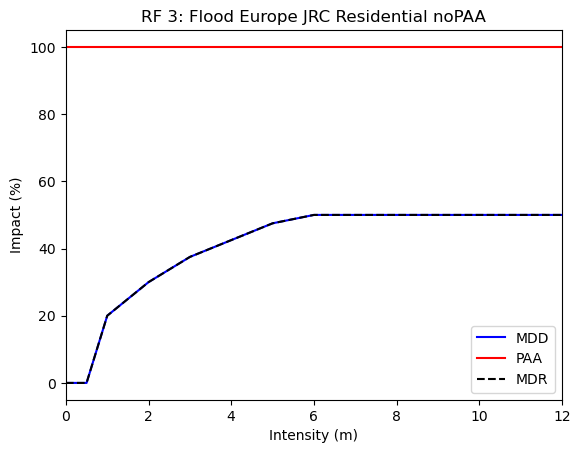

In [477]:
impf = impf_set_flood.get_func()['RF'][3].plot()


In [479]:
impact.at_event

array([4.37138110e+09, 2.08817705e+10, 2.09399600e+10, 4.40355841e+09,
       1.37092505e+10, 6.12511171e+09, 5.82495824e+10, 3.89464237e+09,
       2.46773822e+10, 4.30191681e+09, 1.51637748e+09, 1.39819239e+09,
       2.03301134e+09, 4.76792182e+09, 6.20535259e+10, 1.10143705e+11,
       5.85041314e+09, 4.20556950e+09, 2.27442274e+09, 4.07746178e+10,
       6.15089174e+10, 4.75930513e+10, 6.30544137e+10, 5.76464830e+09,
       2.13909387e+09, 3.11529717e+09, 2.15173971e+10, 8.82291411e+09,
       8.09022810e+09, 1.93492724e+10])

<AxesSubplot:title={'center':'RF 2: Flood Asia JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

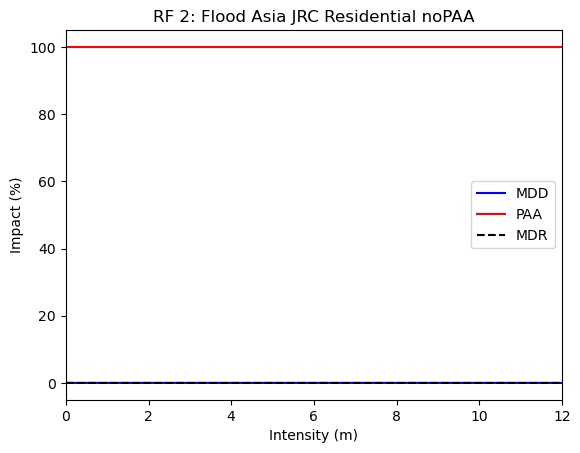

In [278]:
impf_dict['ARA']['gswp3_h08_hist'][1].plot()

In [275]:
a['ARA']

TypeError: list indices must be integers or slices, not str

<AxesSubplot:title={'center':'RF 2: Flood Asia JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

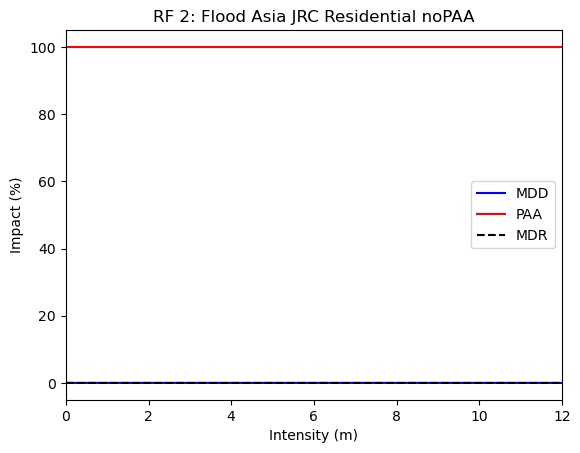

In [273]:
impf2.plot()